<a href="https://colab.research.google.com/github/TheBoringStuffs/model-creation/blob/master/3_ways_of_model_creation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()

In [0]:
#Load data into DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [0]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [0]:
#Convert datatype as float
df = df.astype(float)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [0]:
#append "target" and name it "label"
df['label'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [0]:
#use string label instead
df['label'] = df.label.replace(dict(enumerate(iris.target_names)))
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [0]:
#label -> one-hot encoding
label = pd.get_dummies(df['label'])
label.columns = ['label_' + str(x) for x in label.columns]
df = pd.concat([df, label], axis=1)

#drop old label
df.drop(['label'], axis=1, inplace=True)

In [0]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label_setosa,label_versicolor,label_virginica
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1
149,5.9,3.0,5.1,1.8,0,0,1


In [0]:
#creating X and Y
X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]

#convert DataFrame into numpy array
X = np.asarray(X)

y = df[['label_setosa', 'label_versicolor', 'label_virginica']]
#convert DataFrame into numpy array
y = np.asarray(y)

In [0]:



#lets split the dataset in 75% - 25%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# **Sequential Model**

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#Passing a list of layers to the constructor
model = Sequential([
        Dense(5, activation="relu", input_shape=(4, )),
        Dense(10, activation="relu"),
        Dense(8, activation="relu"),
        Dense(3, activation="softmax")             
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 25        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                60        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 27        
Total params: 200
Trainable params: 200
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(
    optimizer = 'rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [0]:
history = model.fit(X_train, y_train, batch_size=64, epochs=30, validation_split=0.2)

Epoch 1/30
2/2 [==============================] - 0s 104ms/step - loss: 1.7886 - accuracy: 0.3708 - val_loss: 2.2707 - val_accuracy: 0.3043
Epoch 2/30
2/2 [==============================] - 0s 18ms/step - loss: 1.6410 - accuracy: 0.3708 - val_loss: 2.0781 - val_accuracy: 0.3043
Epoch 3/30
2/2 [==============================] - 0s 17ms/step - loss: 1.5345 - accuracy: 0.3708 - val_loss: 1.9221 - val_accuracy: 0.3043
Epoch 4/30
2/2 [==============================] - 0s 18ms/step - loss: 1.4511 - accuracy: 0.3708 - val_loss: 1.8033 - val_accuracy: 0.3043
Epoch 5/30
2/2 [==============================] - 0s 17ms/step - loss: 1.3798 - accuracy: 0.3708 - val_loss: 1.6907 - val_accuracy: 0.3043
Epoch 6/30
2/2 [==============================] - 0s 18ms/step - loss: 1.3178 - accuracy: 0.3708 - val_loss: 1.6142 - val_accuracy: 0.3043
Epoch 7/30
2/2 [==============================] - 0s 17ms/step - loss: 1.2736 - accuracy: 0.3708 - val_loss: 1.5631 - val_accuracy: 0.3043
Epoch 8/30
2/2 [==========

In [0]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

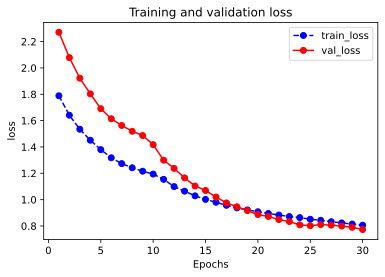

In [0]:
plot_metric(history, 'loss')

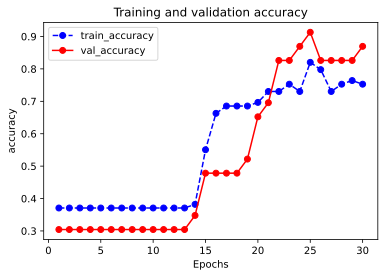

In [0]:
plot_metric(history, 'accuracy')

In [0]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 3ms/step - loss: 0.7675 - accuracy: 0.8684


[0.7674807906150818, 0.8684210777282715]

# **Functional API**

In [0]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# This returns a tensor
inputs = Input(shape=(4,))

# A layer instance is callable on a tensor, and returns a tensor
x = Dense(5, activation='relu')(inputs)
x = Dense(10, activation='relu')(x)
outputs = Dense(3, activation='softmax')(x)

# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 25        
_________________________________________________________________
dense_5 (Dense)              (None, 10)                60        
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 33        
Total params: 118
Trainable params: 118
Non-trainable params: 0
_________________________________________________________________


In [0]:
# First configure model using model.compile()
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Then, train the model with fit()
history = model.fit(X_train, y_train,
                    batch_size= 64,
                    epochs= 30,
                    validation_split=0.2
                   )

Epoch 1/30
2/2 [==============================] - 0s 59ms/step - loss: 1.1580 - accuracy: 0.3146 - val_loss: 1.1294 - val_accuracy: 0.2174
Epoch 2/30
2/2 [==============================] - 0s 17ms/step - loss: 1.0862 - accuracy: 0.3596 - val_loss: 1.0936 - val_accuracy: 0.5217
Epoch 3/30
2/2 [==============================] - 0s 20ms/step - loss: 1.0501 - accuracy: 0.5056 - val_loss: 1.0695 - val_accuracy: 0.6522
Epoch 4/30
2/2 [==============================] - 0s 17ms/step - loss: 1.0245 - accuracy: 0.6067 - val_loss: 1.0511 - val_accuracy: 0.6522
Epoch 5/30
2/2 [==============================] - 0s 17ms/step - loss: 1.0026 - accuracy: 0.6180 - val_loss: 1.0365 - val_accuracy: 0.3913
Epoch 6/30
2/2 [==============================] - 0s 21ms/step - loss: 0.9834 - accuracy: 0.5169 - val_loss: 1.0234 - val_accuracy: 0.3043
Epoch 7/30
2/2 [==============================] - 0s 17ms/step - loss: 0.9684 - accuracy: 0.5169 - val_loss: 1.0120 - val_accuracy: 0.2609
Epoch 8/30
2/2 [===========

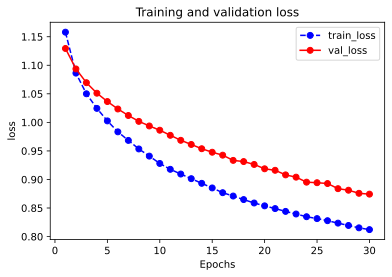

In [0]:
plot_metric(history, 'loss')

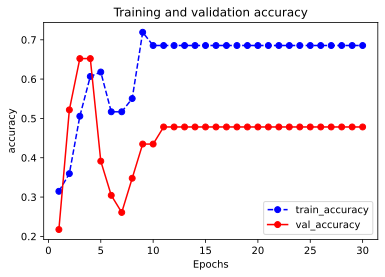

In [0]:
plot_metric(history, 'accuracy')

In [0]:
model.evaluate(x = X_test,y = y_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.8051 - accuracy: 0.7368


[0.8051163554191589, 0.7368420958518982]

## Mulit-input and multi-output models
![alt text](https://miro.medium.com/max/1400/1*g53L2TfbdLDzFTJTlCYsxg.png)

In [0]:
from tensorflow.keras.layers import concatenate

# 2 inputs, one structure data, the other image data
input_structure = Input(shape=(4,), name='input_structure')
input_image = Input(shape=(256,), name='input_image')

# middle layers
x_1 = Dense(10, activation='relu')(input_structure)
x_2 = Dense(100, activation='relu')(input_image)
c = concatenate([x_1, x_2])
outputs = Dense(3, activation='sigmoid', name='outputs')(c)
model = Model(inputs=[input_structure, input_image], outputs=outputs)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_structure (InputLayer)    [(None, 4)]          0                                            
__________________________________________________________________________________________________
input_image (InputLayer)        [(None, 256)]        0                                            
__________________________________________________________________________________________________
dense_7 (Dense)                 (None, 10)           50          input_structure[0][0]            
__________________________________________________________________________________________________
dense_8 (Dense)                 (None, 100)          25700       input_image[0][0]                
____________________________________________________________________________________________

## For a model with 1 input and 2 outputs
![alt text](https://miro.medium.com/max/1400/1*3iqPWQZDykNNWnQgD_knZg.png)

In [0]:
from tensorflow.keras.layers import concatenate

# only one input
input_image = Input(shape=(256,), name='input_image')

# middle layer
x = Dense(300, activation='relu')(input_image)

# output layser
output_1 = Dense(1, activation='sigmoid', name='output_1')(x)
output_2 = Dense(3, activation='softmax', name='output_2')(x)
model = Model(inputs=input_image, outputs=[output_1, output_2])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_image (InputLayer)        [(None, 256)]        0                                            
__________________________________________________________________________________________________
dense_9 (Dense)                 (None, 300)          77100       input_image[0][0]                
__________________________________________________________________________________________________
output_1 (Dense)                (None, 1)            301         dense_9[0][0]                    
__________________________________________________________________________________________________
output_2 (Dense)                (None, 3)            903         dense_9[0][0]                    
Total params: 78,304
Trainable params: 78,304
Non-trainable params: 0
______________________

## Shayred layer in Functional API

In [0]:
inputs = Input(shape=(4,))

# a layer instance is callable on a tensor, and returns a tensor
shared_layer = Dense(4, activation='relu')

# Now we apply the layer three times
x = shared_layer(inputs)
x = shared_layer(x)
x = shared_layer(x)
x = shared_layer(x)
predictions = Dense(3, activation='softmax')(x)
model = Model(inputs=inputs, outputs=predictions)
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 4)]          0                                            
__________________________________________________________________________________________________
dense_12 (Dense)                (None, 4)            20          input_2[0][0]                    
                                                                 dense_12[0][0]                   
                                                                 dense_12[1][0]                   
                                                                 dense_12[2][0]                   
__________________________________________________________________________________________________
dense_13 (Dense)                (None, 3)            15          dense_12[3][0]             

# **Model Subclassing**

In [0]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
class CustomModel(Model):
    
    def __init__(self, **kwargs):
        super(CustomModel, self).__init__(**kwargs)
        self.dense1 = Dense(5, activation='relu', )
        self.dense2 = Dense(10, activation='relu')
        self.dense3 = Dense(3, activation='softmax')
        
    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        return self.dense3(x)
my_custom_model = CustomModel(name='my_custom_model')

In [0]:
my_custom_model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = my_custom_model.fit(X_train, y_train,
                    batch_size= 64,
                    epochs= 30,
                    validation_split=0.2)

Epoch 1/30

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

2/2 [==============================] - 0s 61ms/step - loss: 1.7249 - accuracy: 0.3708 - val_loss: 2.0409 - val_accuracy: 0.3043
Epoch 2/30
2/2 [==============================] - 0s 16ms/step - loss: 1.6271 - accuracy: 0.3708 - val_loss: 1.9463 - val_accuracy: 0.3043
Epoch 3/30
2/2 [==============================] - 0s 17ms/step - loss: 1.5680 - accuracy: 0.3708 - val_loss: 1.8774 - val_accuracy: 0.3043
Epoch 4/30
2/2 [==============================] - 0s 18ms/step - loss: 1.5222 - accuracy: 0

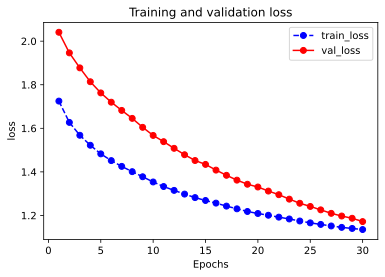

In [0]:
plot_metric(history, 'loss')

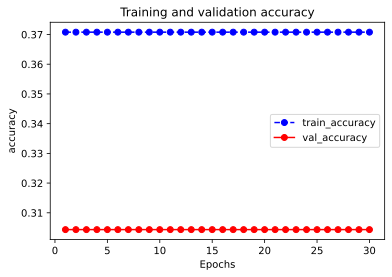

In [0]:
plot_metric(history, 'accuracy')

In [0]:
my_custom_model.evaluate(x = X_test,y = y_test)

2/2 [==============================] - 0s 3ms/step - loss: 1.1886 - accuracy: 0.2632


[1.1885889768600464, 0.2631579041481018]

# **REFRENCES**
1. [Keras official document: When to use Sequential Model](https://keras.io/guides/sequential_model/#when-to-use-a-sequential-model)
2. [Keras official document: When to use Functional API](https://keras.io/guides/functional_api/)
3. Ways to create a Machine Learning model with Keras and TensorFlow 2.0 (Sequential, Functional, and Model Subclassing) [link text](https://towardsdatascience.com/3-ways-to-create-a-machine-learning-model-with-keras-and-tensorflow-2-0-de09323af4d3)

Thaks to BindiChen for this code.
</br>
All © rights are reserved by BindiChen

